<a href="https://colab.research.google.com/github/AliValizade/Machine_Learning/blob/main/ML_41.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# KNN (K Nearest Neigber)

- Apple : 0
- Banana : 1
- watermelon : 2

<img src="https://fruityland.co/wp-content/uploads/2021/01/Granny-smith-green-apple-FL.jpg" width="200px" height="180px">

<img src="https://target.scene7.com/is/image/Target/GUEST_cf4773e6-afec-4aa1-89e7-74b7dfc09973?wid=1200&hei=1200&qlt=80&fmt=webp" width="200px" height="180px">

<img src="https://starfishmarket.com/wp-content/uploads/2015/11/watermelon-580x437.jpg" width="200px" height="180px">


In [45]:
def generate_dataset(n):
  apple_width = np.random.normal(6, 1, n)
  apple_lenght = np.random.normal(7, 1, n)
  banana_width = np.random.normal(3, 1, n)
  banana_lenght = np.random.normal(10, 1, n)
  watermelon_width = np.random.normal(13, 1, n)
  watermelon_lenght = np.random.normal(20, 1, n)

  width = np.concatenate((apple_width, banana_width, watermelon_width))
  lenght = np.concatenate((apple_lenght, banana_lenght, watermelon_lenght))
  X = np.array([width, lenght]).T

  Y_apple =  np.zeros(n, dtype='int')
  Y_banana = np.ones(n, dtype='int')
  Y_watermelon = np.ones(n, dtype='int') * 2
  Y = np.concatenate((Y_apple, Y_banana, Y_watermelon))

  return X, Y

In [48]:
X_train, Y_train = generate_dataset(200)

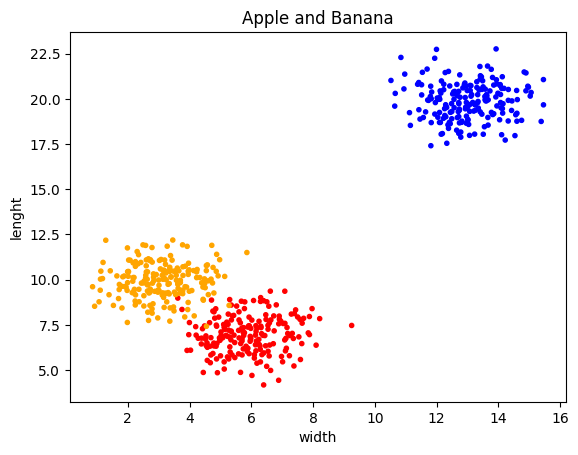

In [50]:
cmap = ['red', 'orange', 'blue']
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap=ListedColormap(cmap), marker='.')
plt.title('Apple and Banana')
plt.xlabel('Width')
plt.ylabel('Lenght')
plt.show()

In [64]:
class KNN:
  def __init__(self, k):
    self.k = k

  # Training
  def fit(self, X, Y):
    self.X_train = X
    self.Y_train = Y

  def euqlidian_distance(self, x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

  def predict(self, x):
    distances = []
    for x_train in X_train:
      d = self.euqlidian_distance(x, x_train)
      distances.append(d)

    nearest_neighbors = np.argsort(distances)[0:self.k]
    result = np.bincount(Y_train[nearest_neighbors])
    y = np.argmax(result)

    return y

In [65]:
knn = KNN(k=5)
knn.fit(X_train, Y_train)

In [66]:
new_fruit = np.array([9, 15])
result = knn.predict(new_fruit)

In [63]:
if result == 0:
  print('Apple🍎')
elif result == 1:
  print('Banana🍌')
elif result == 2:
  print('Watermelon🍉')

Watermelon🍉
